# NMR processing

##### Imports

In [1]:
from spectrochempy.api import *
import os


        SpectroChemPy's API
        Version   : 0.1a2.post45
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


### import data

In [2]:
path = os.path.join(data, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')

# load the data in a new dataset
source = NDDataset()
source.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
source

NDDataset([  -0.419,   -0.216, ...,        0,       -0])

##### Plot

<IPython.core.display.Javascript object>


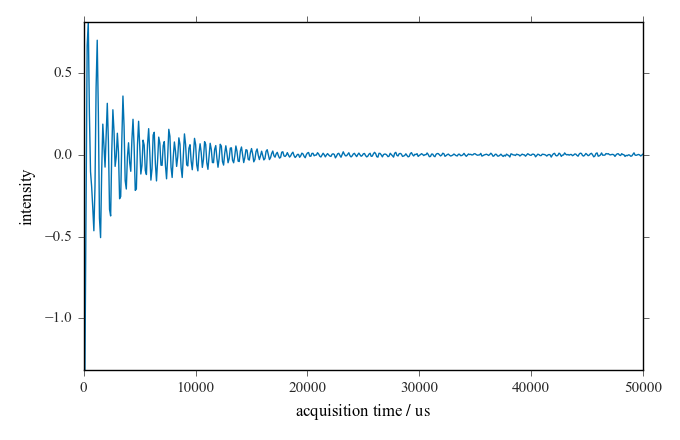

In [3]:
source.plot(xlim=(0,50000))

<IPython.core.display.Javascript object>


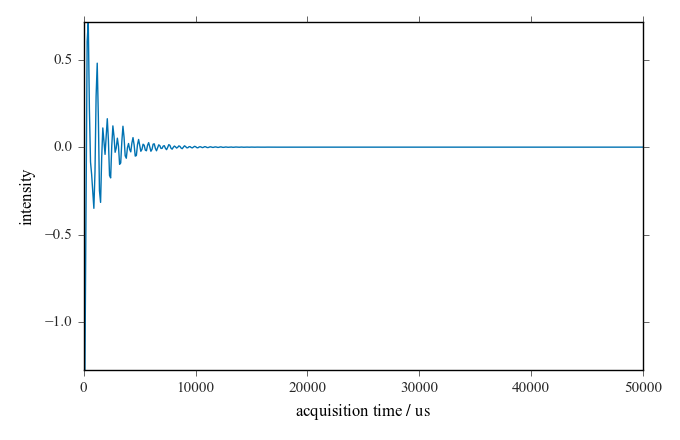

In [4]:
lb_source = source.em(lb=100.*ur.Hz)
lb_source.plot(xlim=(0,50000))

In [5]:
lb_source is source

False

In [6]:
lb_source_2 = source.em(lb=100.*ur.Hz, inplace=True)
lb_source_2 is source

True

<IPython.core.display.Javascript object>


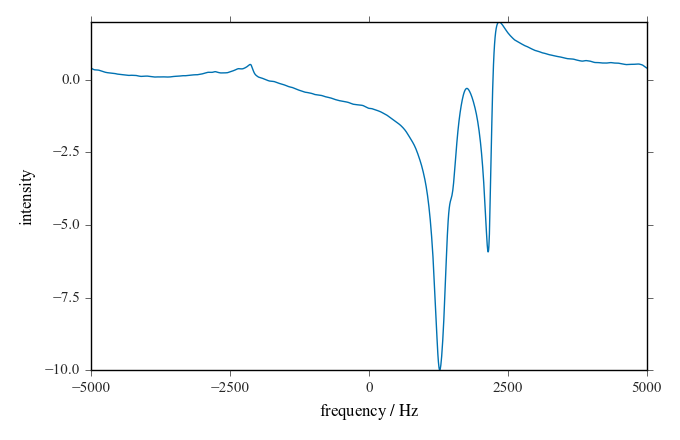

In [7]:
transf = lb_source.zf_auto()
transf.fft(inplace=True)
transf.plot()   

As the new dataset is transformed, function that apply to time data such as **em** should not work

In [8]:
_ = transf.em(lb=10*ur.Hz)

 ERROR | apodization functions apply only to dimensions with [time] dimensionality


<IPython.core.display.Javascript object>


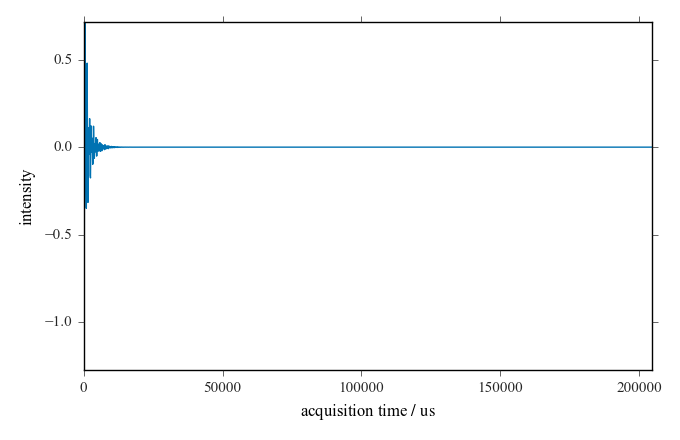

<IPython.core.display.Javascript object>


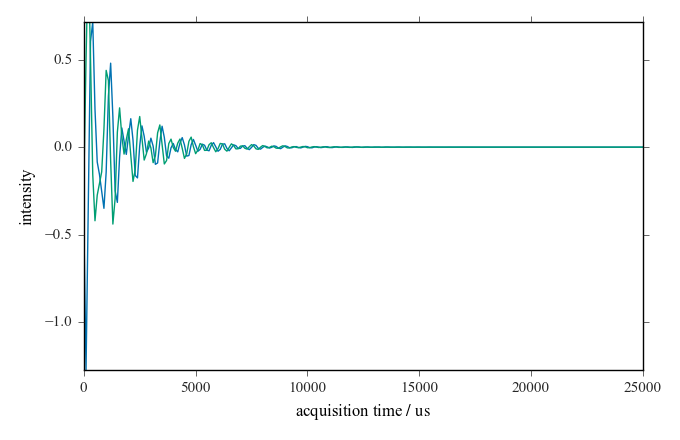

In [9]:
ax1 = source.plot()

# perform some analysis
assert source.is_complex[-1]

# test if we can plot on the same figure
source.plot(hold=True, xlim=(0.,25000.))
# we want to superpose a second spectrum
ax2 = source.plot(imag=True, data_only=True)


<IPython.core.display.Javascript object>


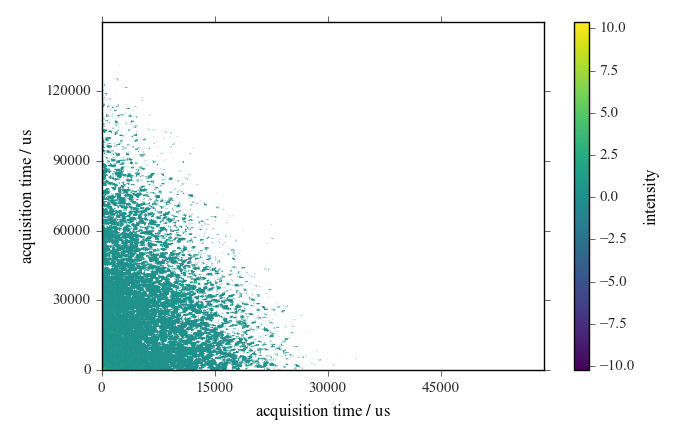

In [10]:
path = os.path.join(data, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')

# load the data in a new dataset
source = NDDataset()
source.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
source.plot()

<IPython.core.display.Javascript object>


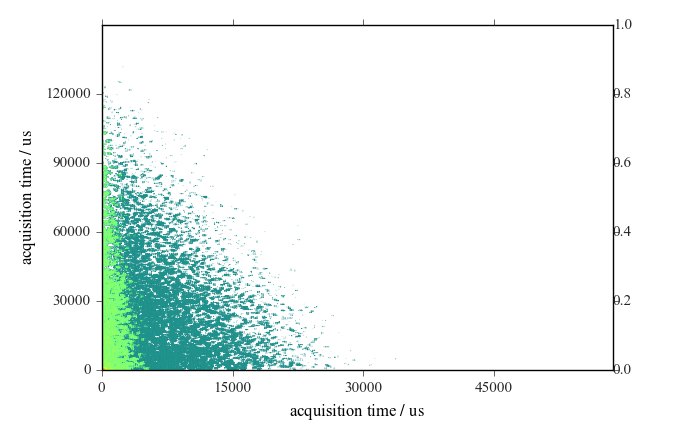

In [19]:
path = os.path.join(data, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')

# load the data in a new dataset
source = NDDataset()
source.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
source.plot(hold=True, colorbar=False)

# broadening on the observation axis
source.em(lb=100.*ur.Hz, inplace=True)
# call on axis 0, the inderect axis
source.em(lb=100.*ur.Hz, axis=0, inplace=True)

source.plot(data_only=True, cmap='jet')  # it is generally better to change the 
